In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set up the planet and atmosphere model.
planet=Planet("TITAN")
planet.h_skip = 1270E3
planet.h_trap =  0.0E3
planet.loadAtmosphereModel('../atmdata/titan-gram-avg.dat', 0 , 1 , 2, 3)

In [27]:
speedRange = np.linspace(5, 8, 7)
gammaRange = np.linspace(-75, -45, 7)

acc_net_g_max_array       = np.zeros((len(speedRange),len(gammaRange)))
q_stag_total_max_array    = np.zeros((len(speedRange),len(gammaRange)))
heatload_max_array        = np.zeros((len(speedRange),len(gammaRange)))
dyn_pres_array            = np.zeros((len(speedRange),len(gammaRange)))
n = 0

for i, speed in enumerate(speedRange):
    for j, gamma in enumerate(gammaRange):
        vehicle=Vehicle('Huygens', 320, 35, 0.0, np.pi*2.7**2.0*0.25, 0.0, 1.25, planet)
        vehicle.setInitialState(1270,0.0,0.0,speed,0.0,gamma,0.0,0.0)
        vehicle.setSolverParams(1E-6)
        vehicle.propogateEntry (45*60, 1.0, 0.0)
        n+=1
        print("n = " + str(n) +"G_MAX: "+str("{:.2f}".format(max(vehicle.acc_net_g)))+", Q_MAX: "+str("{:.2f}".format(max(vehicle.q_stag_total)))+", J_MAX: "+str("{:.2f}".format(max(vehicle.heatload/1.0E3)))+", P_MAX: "+str("{:.2f}".format(max(vehicle.dyn_pres_atm))))

        acc_net_g_max_array[i,j]     = max(vehicle.acc_net_g)
        q_stag_total_max_array[i,j]  = max(vehicle.q_stag_total)
        heatload_max_array[i,j]      = max(vehicle.heatload/1.0E3)
        dyn_pres_array[i,j]         = max(vehicle.dyn_pres_atm)

n = 1G_MAX: 10.03, Q_MAX: 19.23, J_MAX: 0.99, P_MAX: 0.03
n = 2G_MAX: 9.50, Q_MAX: 18.74, J_MAX: 1.02, P_MAX: 0.03
n = 3G_MAX: 8.81, Q_MAX: 18.09, J_MAX: 1.05, P_MAX: 0.03
n = 4G_MAX: 7.96, Q_MAX: 17.25, J_MAX: 1.10, P_MAX: 0.03
n = 5G_MAX: 6.93, Q_MAX: 16.18, J_MAX: 1.17, P_MAX: 0.02
n = 6G_MAX: 5.68, Q_MAX: 14.79, J_MAX: 1.27, P_MAX: 0.02
n = 7G_MAX: 4.12, Q_MAX: 12.88, J_MAX: 1.44, P_MAX: 0.01
n = 8G_MAX: 11.97, Q_MAX: 25.17, J_MAX: 1.19, P_MAX: 0.04
n = 9G_MAX: 11.34, Q_MAX: 24.53, J_MAX: 1.22, P_MAX: 0.04
n = 10G_MAX: 10.51, Q_MAX: 23.66, J_MAX: 1.26, P_MAX: 0.04
n = 11G_MAX: 9.48, Q_MAX: 22.56, J_MAX: 1.32, P_MAX: 0.03
n = 12G_MAX: 8.23, Q_MAX: 21.14, J_MAX: 1.40, P_MAX: 0.03
n = 13G_MAX: 6.71, Q_MAX: 19.29, J_MAX: 1.53, P_MAX: 0.02
n = 14G_MAX: 4.80, Q_MAX: 16.72, J_MAX: 1.74, P_MAX: 0.02
n = 15G_MAX: 14.11, Q_MAX: 32.27, J_MAX: 1.40, P_MAX: 0.05
n = 16G_MAX: 13.35, Q_MAX: 31.44, J_MAX: 1.44, P_MAX: 0.05
n = 17G_MAX: 12.37, Q_MAX: 30.33, J_MAX: 1.49, P_MAX: 0.04
n = 18G_MAX: 11.

In [6]:
from scipy import interpolate

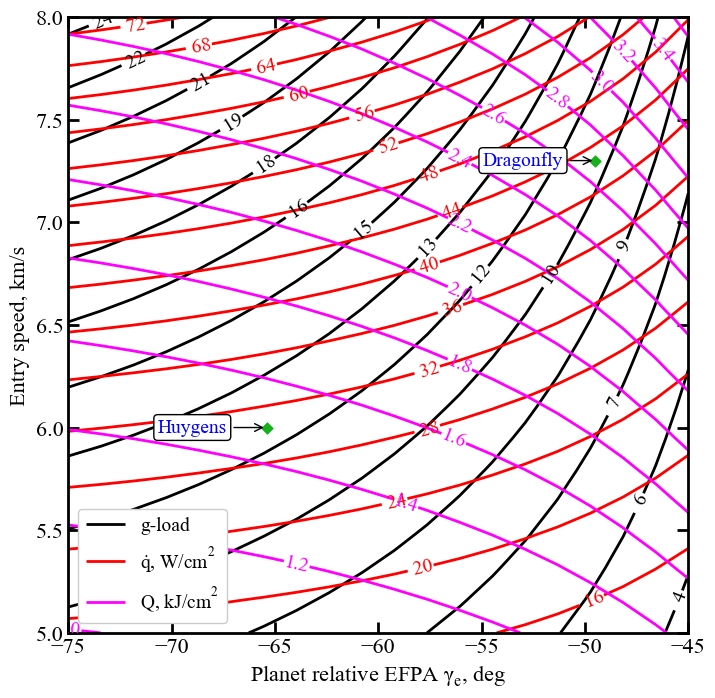

In [28]:

f1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(acc_net_g_max_array), kind='cubic')
q1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(q_stag_total_max_array), kind='cubic')
h1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(heatload_max_array), kind='cubic')
s1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(dyn_pres_array), kind='cubic')

x_new = np.linspace(5, 8, 20)
y_new = np.linspace(-75, -45, 20)


g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        g1_new[i,j] = f1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        s1_new[i,j] = s1(x_new[i],y_new[j])

X, Y = np.meshgrid(x_new, y_new)

fig = plt.figure()
fig.set_size_inches([8, 8])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

GCS1 = plt.contour(Y, X, np.transpose(g1_new), levels=15, linewidths=2.0, colors='black')
plt.clabel(GCS1, inline=1, fontsize=14, colors='black',fmt='%3d',inline_spacing=1)
#GCS1.collections[0].set_label(r'g-load')

QCS1 = plt.contour(Y, X, np.transpose(q1_new),  levels=15, linewidths=2.0, colors='red')
plt.clabel(QCS1, inline=1, fontsize=14, colors='red',fmt='%3d',inline_spacing=1)
#QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')

HCS1 = plt.contour(Y, X, np.transpose(h1_new), levels=15, linewidths=2.0, colors='magenta')
plt.clabel(HCS1, inline=1, fontsize=14, colors='magenta',fmt='%0.1f',inline_spacing=1)
#HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')

plt.xlabel("Planet relative EFPA "+r'$\gamma_e$'+r', deg' ,fontsize=16)
plt.ylabel(r'Entry speed, km/s' ,fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')


ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

ax.xaxis.set_tick_params(width=2, length=8)
ax.yaxis.set_tick_params(width=2, length=8)

ax.xaxis.set_tick_params(width=1, length=6, which='minor')
ax.yaxis.set_tick_params(width=1, length=6, which='minor')


ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.0)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

h1,l1 = GCS1.legend_elements()
h2,l1 = QCS1.legend_elements()
h3,l1 = HCS1.legend_elements()

plt.legend([h1[0], h2[0], h3[0]], ['g-load', r'$\dot{q}$'+', '+r'$W/cm^2$', r'$Q$'+', '+r'$kJ/cm^2$'], 
           fontsize=14, loc='lower left', framealpha=1.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

plt.scatter(-65.4, 6.0, marker="D", s=30, color='xkcd:green', zorder=2)
plt.annotate("Huygens", xy=(-65.4, 6.0), xytext=(-69, 6.0), va="center", ha="center",
            arrowprops=dict(arrowstyle='->, head_width=0.2', facecolor='blue'), 
            fontsize=14, color='b', bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='k', alpha=1.0))

plt.scatter(-49.5, 7.3, marker="D", s=30, color='xkcd:green', zorder=2)
plt.annotate("Dragonfly", xy=(-49.5, 7.3), xytext=(-53, 7.3), va="center", ha="center",
            arrowprops=dict(arrowstyle='->, head_width=0.2', facecolor='blue'), 
            fontsize=14, color='b', bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='k', alpha=1.0))

plt.savefig('../plots/titan-lander-entry.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
speedRange = np.linspace(5, 8, 7)
gammaRange = np.linspace(-65, -45, 7)

acc_net_g_max_array       = np.zeros((len(speedRange),len(gammaRange)))
q_stag_total_max_array    = np.zeros((len(speedRange),len(gammaRange)))
heatload_max_array        = np.zeros((len(speedRange),len(gammaRange)))
dyn_pres_array            = np.zeros((len(speedRange),len(gammaRange)))
n = 0

for i, speed in enumerate(speedRange):
    for j, gamma in enumerate(gammaRange):
        vehicle=Vehicle('ADEPT', 50, 25.0, 0.0, np.pi*1.5**2.0*0.25, 0.0, 0.20, planet)
        vehicle.setInitialState(1270,0.0,0.0,speed,0.0,gamma,0.0,0.0)
        vehicle.setSolverParams(1E-6)
        vehicle.propogateEntry (60*60, 1.0, 0.0)
        n+=1
        print("n = " + str(n) +"G_MAX: "+str("{:.2f}".format(max(vehicle.acc_net_g)))+", Q_MAX: "+str("{:.2f}".format(max(vehicle.q_stag_total)))+", J_MAX: "+str("{:.2f}".format(max(vehicle.heatload/1.0E3)))+", P_MAX: "+str("{:.2f}".format(max(vehicle.dyn_pres_atm))))

        acc_net_g_max_array[i,j]     = max(vehicle.acc_net_g)
        q_stag_total_max_array[i,j]  = max(vehicle.q_stag_total)
        heatload_max_array[i,j]      = max(vehicle.heatload/1.0E3)
        dyn_pres_array[i,j]         = max(vehicle.dyn_pres_atm)

n = 1G_MAX: 8.65, Q_MAX: 37.97, J_MAX: 2.22, P_MAX: 0.02
n = 2G_MAX: 8.12, Q_MAX: 36.87, J_MAX: 2.29, P_MAX: 0.02
n = 3G_MAX: 7.52, Q_MAX: 35.58, J_MAX: 2.36, P_MAX: 0.02
n = 4G_MAX: 6.84, Q_MAX: 34.07, J_MAX: 2.46, P_MAX: 0.02
n = 5G_MAX: 6.07, Q_MAX: 32.27, J_MAX: 2.59, P_MAX: 0.01
n = 6G_MAX: 5.19, Q_MAX: 30.10, J_MAX: 2.77, P_MAX: 0.01
n = 7G_MAX: 4.16, Q_MAX: 27.39, J_MAX: 3.02, P_MAX: 0.01
n = 8G_MAX: 10.31, Q_MAX: 49.70, J_MAX: 2.67, P_MAX: 0.02
n = 9G_MAX: 9.68, Q_MAX: 48.25, J_MAX: 2.74, P_MAX: 0.02
n = 10G_MAX: 8.95, Q_MAX: 46.54, J_MAX: 2.84, P_MAX: 0.02
n = 11G_MAX: 8.13, Q_MAX: 44.52, J_MAX: 2.96, P_MAX: 0.02
n = 12G_MAX: 7.19, Q_MAX: 42.14, J_MAX: 3.11, P_MAX: 0.02
n = 13G_MAX: 6.12, Q_MAX: 39.24, J_MAX: 3.33, P_MAX: 0.01
n = 14G_MAX: 4.86, Q_MAX: 35.60, J_MAX: 3.65, P_MAX: 0.01
n = 15G_MAX: 12.14, Q_MAX: 63.68, J_MAX: 3.15, P_MAX: 0.03
n = 16G_MAX: 11.38, Q_MAX: 61.83, J_MAX: 3.24, P_MAX: 0.03
n = 17G_MAX: 10.52, Q_MAX: 59.62, J_MAX: 3.35, P_MAX: 0.03
n = 18G_MAX: 9.54, 

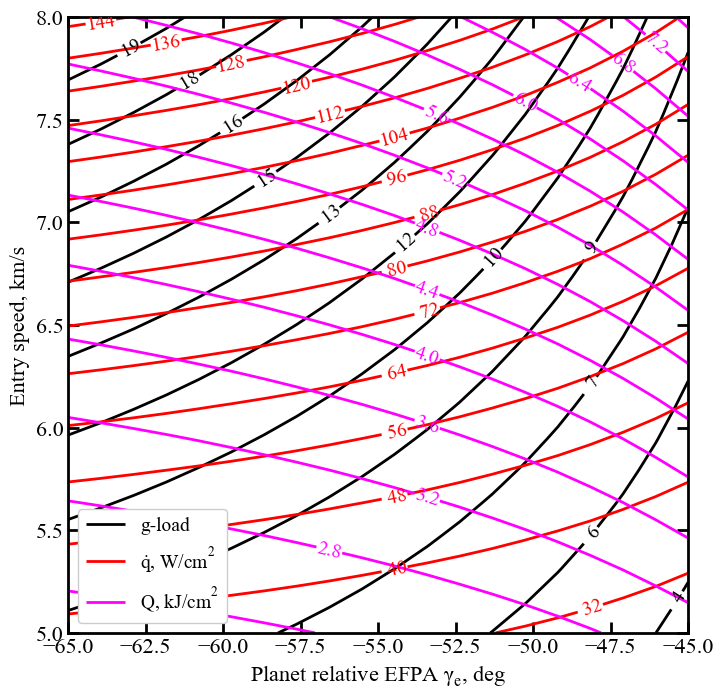

In [30]:
f1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(acc_net_g_max_array), kind='cubic')
q1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(q_stag_total_max_array), kind='cubic')
h1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(heatload_max_array), kind='cubic')
s1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(dyn_pres_array), kind='cubic')

x_new = np.linspace(5, 8, 20)
y_new = np.linspace(-65, -45, 20)


g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        g1_new[i,j] = f1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        s1_new[i,j] = s1(x_new[i],y_new[j])

X, Y = np.meshgrid(x_new, y_new)

fig = plt.figure()
fig.set_size_inches([8, 8])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

GCS1 = plt.contour(Y, X, np.transpose(g1_new), levels=15, linewidths=2.0, colors='black')
plt.clabel(GCS1, inline=1, fontsize=14, colors='black',fmt='%3d',inline_spacing=1)
#GCS1.collections[0].set_label(r'g-load')

QCS1 = plt.contour(Y, X, np.transpose(q1_new),  levels=15, linewidths=2.0, colors='red')
plt.clabel(QCS1, inline=1, fontsize=14, colors='red',fmt='%3d',inline_spacing=1)
#QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')

HCS1 = plt.contour(Y, X, np.transpose(h1_new), levels=15, linewidths=2.0, colors='magenta')
plt.clabel(HCS1, inline=1, fontsize=14, colors='magenta',fmt='%0.1f',inline_spacing=1)
#HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')

plt.xlabel("Planet relative EFPA "+r'$\gamma_e$'+r', deg' ,fontsize=16)
plt.ylabel(r'Entry speed, km/s' ,fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')


ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

ax.xaxis.set_tick_params(width=2, length=8)
ax.yaxis.set_tick_params(width=2, length=8)

ax.xaxis.set_tick_params(width=1, length=6, which='minor')
ax.yaxis.set_tick_params(width=1, length=6, which='minor')


ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.0)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

h1,l1 = GCS1.legend_elements()
h2,l1 = QCS1.legend_elements()
h3,l1 = HCS1.legend_elements()

plt.legend([h1[0], h2[0], h3[0]], ['g-load', r'$\dot{q}$'+', '+r'$W/cm^2$', r'$Q$'+', '+r'$kJ/cm^2$'], 
           fontsize=14, loc='lower left', framealpha=1.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)


plt.savefig('../plots/titan-low-bc.png', dpi=300, bbox_inches='tight')
plt.show()